#### Question 1- 
#### Implement a two-layer perceptron with the backpropagation algorithm to solve the parity problem. The desired output for the parity problem is 1 if an input pattern (which contains 4-binary bits) contains an odd number of 1's, and 0 otherwise. Use a network where the input has 4 binary elements, 4 hidden units for the first layer, and one output unit for the second layer. The learning procedure is stopped when an absolute error (difference) of 0.05 is reached for every input pattern.

In [1]:
import numpy as np
from copy import deepcopy
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#the 4 bit parity problem is as follows: 
#when the number of bits = '1' are odd, set the output to 1
#else set it to '0'.

In [3]:
#function converting interger to binary, as parity problem deals with binary bits.
def Binaryconversion(num):
    binaryresult = np.unpackbits(np.arange(num, num+1, dtype='>i%d' %(1)).view(np.uint8))[-4:]
    return binaryresult

In [4]:
#the input data is an array of 16 rows
#each row of the input would be 0000, 0001, 0010, 0011,.....1110, 1111
def input_data_for_training():
    X = np.array([[1] + list(Binaryconversion(i)) for i in range(0,16)]).T
    D = np.array([bin(i).count("1")%2!=0 for i in range(0,16)]).reshape(1,16).astype(int)
    return X,D

In [5]:
#using uniform distribution for assigning weights, random order sampling
#all the weight values are going to have an equal probability of being assigned
#min weight being -1, max weight being +1
def wtinitialization():
    return [np.random.uniform(-1, 1, (5, 4))] + [np.random.uniform(-1, 1, (5, 1))]

In [6]:
#using logistic sigmoid activation function
#f(x)= 1/1+e^(-x)
def sigmoid_activation_function(z):
    return 1/(1 + np.exp(-z))

In [7]:
#the input data is passed to the hidden layers
#this is processed using the sigmoid function and passed forward
def forward_propagation(x,W_layers):
    Output_Array = []
    #dot product of transpose of 1st hidden layer with the input layer--> output
    Output_Array.append(sigmoid_activation_function(np.dot(W_layers[0].T,x)))
    #dot product of transpose of 2nd hidden layer with the output of previous layer
    Output_Array.append(sigmoid_activation_function(np.dot(W_layers[1].T,np.insert(Output_Array[0],0,1,axis=0))))
    #return the output array
    return np.array(Output_Array)

In [8]:
#backpropagation of errors:
#calculates gradient wrt weights
def back_propagation(x,Y,d_k,Wts,learning_rate,delta_hid,momentum):
    #output of the 2nd hidden layer
    y = Y[1]
    delta_k = y*(1-y)*(d_k-y)
    #delta rule(gradient descent) for weight updation
    #2nd hidden layer's wt calculated via gd
    delta_hid[1] = learning_rate*delta_k.T*np.insert(Y[0],0,1,axis=0)+(momentum*delta_hid[1])
    
    delta_j = Y[0]*(1-Y[0])*Wts[1][1:,:]*delta_k
    #1st hidden layer's wt obtained by backpropagating 
    delta_hid[0] = learning_rate*delta_j.T*x+(momentum*delta_hid[0])
    
    #weight updation for the hidden layers
    Wts[0] += delta_hid[0]
    Wts[1] += delta_hid[1]
    

In [9]:
#multilayer perceptron network
#returns the number of epochs required to converge
def multi_layer_perceptron(X,D,Wts,learning_rate,momentum):
    number_of_epochs = 0
    delta_hid = [np.zeros((5, 4))] + [np.zeros((5, 1))]

    while True:
        isError = False
        for i in range(0,16):
            x = X[:,i].reshape(5,1)
            Y = forward_propagation(x,Wts)
            back_propagation(x, Y, np.reshape(D[:, i], (1, 1)), Wts, learning_rate, delta_hid, momentum)
            #stopping the learning process when absolute error is 0.05
            error_diff=np.squeeze(D[:,i]-Y[1])
            if np.abs(error_diff) > 0.05:
                isError = True
        number_of_epochs += 1
        if not isError:
            break

    return number_of_epochs


<ipython-input-7-ea28d640e69f>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(Output_Array)


momentum=0 or to say without using any momentum
learning rate :  0.05 , epochs :  35430
momentum=0 or to say without using any momentum
learning rate :  0.1 , epochs :  18879
momentum=0 or to say without using any momentum
learning rate :  0.15000000000000002 , epochs :  330554
momentum=0 or to say without using any momentum
learning rate :  0.2 , epochs :  104553
momentum=0 or to say without using any momentum
learning rate :  0.25 , epochs :  78757
momentum=0 or to say without using any momentum
learning rate :  0.3 , epochs :  65797
momentum=0 or to say without using any momentum
learning rate :  0.35000000000000003 , epochs :  57959
momentum=0 or to say without using any momentum
learning rate :  0.4 , epochs :  52857
momentum=0 or to say without using any momentum
learning rate :  0.45 , epochs :  49432
momentum=0 or to say without using any momentum
learning rate :  0.5 , epochs :  47129


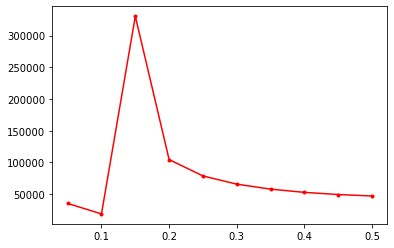

In [10]:
#main function
if __name__ == "__main__":
    x=[]
    y=[]
    X,D = input_data_for_training()
    Wts = wtinitialization()
    #implementation when momentum=0
    for learning_rate in np.arange(0.05, 0.51, 0.05):
        epochs=multi_layer_perceptron(X, D, deepcopy(Wts), learning_rate, 0)
        print("momentum=0 or to say without using any momentum")
        print("learning rate : ", learning_rate, ", epochs : ", epochs)
#         print("Keeping the momentum to 0.9")
#         print("learning rate : ", learning_rate, ", momentum : ", 0.9, " epoch : ", epochs)
        x.append(learning_rate)
        y.append(epochs)
    plt.figure(0)
    plt.plot(x,y, marker='o', markersize=3, color="red")
    plt.show()
    

#### It can be seen without a momentum factor, it takes a long time ie., a large number of epochs to converge. It can also observed that even without alpha, when the learning rate increases, convergence is relatively quick.

<ipython-input-7-ea28d640e69f>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(Output_Array)


momentum=0.9 
learning rate :  0.05 ,  epochs :  10016
momentum=0.9 
learning rate :  0.1 ,  epochs :  17303
momentum=0.9 
learning rate :  0.15000000000000002 ,  epochs :  27860
momentum=0.9 
learning rate :  0.2 ,  epochs :  6702
momentum=0.9 
learning rate :  0.25 ,  epochs :  4996
momentum=0.9 
learning rate :  0.3 ,  epochs :  5084
momentum=0.9 
learning rate :  0.35000000000000003 ,  epochs :  5708
momentum=0.9 
learning rate :  0.4 ,  epochs :  5747
momentum=0.9 
learning rate :  0.45 ,  epochs :  8840
momentum=0.9 
learning rate :  0.5 ,  epochs :  1567


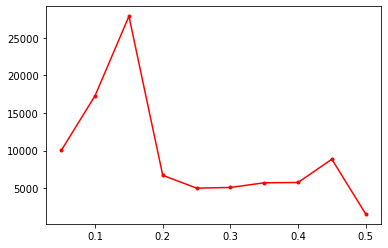

In [29]:
    x=[]
    y=[]
    X,D = input_data_for_training()
    Wts = wtinitialization()
#     implementation when momentum=0.9
    for learning_rate1 in np.arange(0.05, 0.51, 0.05):
        epochs1=multi_layer_perceptron(X, D, deepcopy(Wts), learning_rate1, 0.9)
        print("momentum=0.9 ")
        print("learning rate : ", learning_rate1, ",  epochs : ", epochs1)
    #         print("Keeping the momentum to 0.9")
    #         print("learning rate : ", learning_rate, ", momentum : ", 0.9, " epoch : ", epochs)
        x.append(learning_rate1)
        y.append(epochs1)
    plt.figure(1)
    plt.plot(x,y, marker='o', markersize=3, color="red")
    plt.show()

##### When using a momentum factor of 0.9, the convergence speeds up by almost 9 times. The change in the number of epochs is almost same as the previous case, where momentum wasn't used. A momentum of 0.9 is helping in stability and quickens convergence. We can see that as learning rate increases, the number of epochs reduces considerably. 

##### For example, without momentum, with a learning rate of 0.5, the number of epochs was 24716.
##### With momentum of 0.9 and learning rate of 0.5, the number of epochs was 2787, which is almost 9 times faster.

#### References-